# Assignment - 2

# Mukkavalli Bharat Chandra - ES19BTECH11016
# Mahesh Korra - ES19BTECH11013

## Question 1

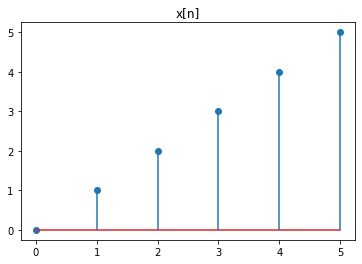

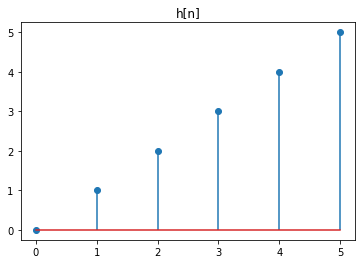

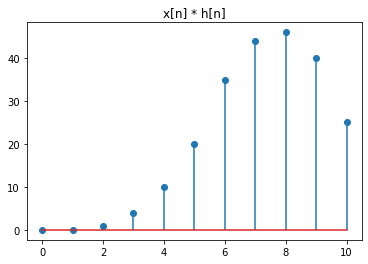

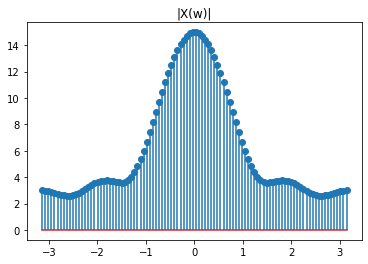

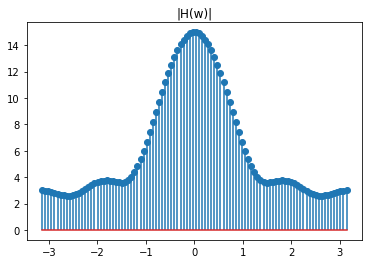

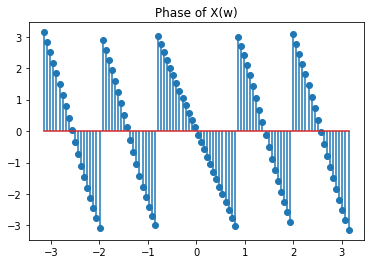

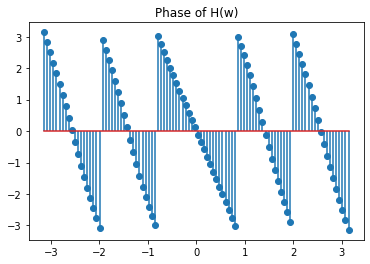

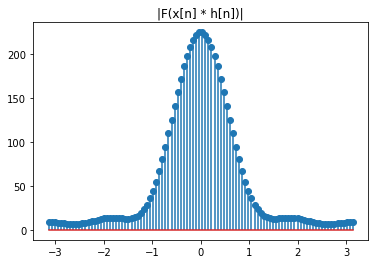

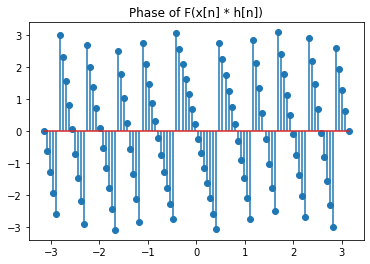

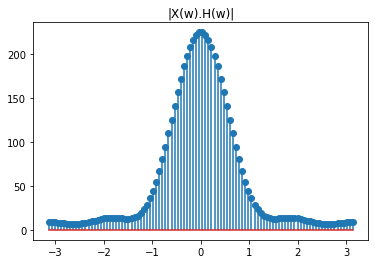

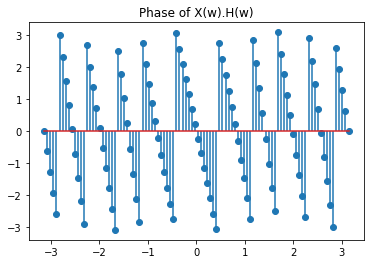

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#Computing the convolution signal
def convolve(x, h, x_indices, h_indices):
    
    #The convolved signal is stored in this list
    y = []

    if len(h) > len(x):
        z = x
        x = h
        h = z
        z = x_indices
        x_indices = h_indices
        h_indices = z

    for n in range(len(x) + len(h) - 1):
        sum = 0
        for k in range(len(x) + 1):        
            if n-k in h_indices and k in x_indices:
                sum = sum + (x[k] * h[n-k])
            else:
                continue
        y.append(sum)
    return y

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#This function computes and returns the magnitude and phase of the Product of the fourier transforms of x[n] and h[n]
def product(x, h):
    
    resultMag = []
    resultPhase = []
    
    for index in range(len(x)):
        resultMag.append(np.sqrt(((x[index] * h[index]).real) ** 2 + ((x[index] * h[index]).imag) ** 2))
        resultPhase.append(np.angle(x[index] * h[index]))
    
    return resultMag, resultPhase

x = [i for i in range(6)]
x_indices = [i for i in range(6)]

Fx, Fx_mag, Fx_phase = DTFT(x_indices, x)

h = x
h_indices = x_indices

Fh, Fh_mag, Fh_phase = Fx, Fx_mag, Fx_phase

y = convolve(x, h, x_indices, h_indices)

Fy, Fy_mag, Fy_phase = DTFT(range(len(x) + len(h) - 1), y)

productMag_Fx_Fh, productPhase_Fx_Fh = product(Fx, Fh)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the graphs
plt.stem(x_indices, x)
plt.title('x[n]')
plt.show()

plt.stem(h_indices, h)
plt.title('h[n]')
plt.show()

plt.stem(range(len(x) + len(h) - 1), y)
plt.title('x[n] * h[n]')
plt.show()

plt.stem(w0, Fx_mag)
plt.title('|X(w)|')
plt.show()

plt.stem(w0, Fh_mag)
plt.title('|H(w)|')
plt.show()

plt.stem(w0, Fx_phase)
plt.title('Phase of X(w)')
plt.show()

plt.stem(w0, Fh_phase)
plt.title('Phase of H(w)')
plt.show()

plt.stem(w0, Fy_mag)
plt.title('|F(x[n] * h[n])|')
plt.show()

plt.stem(w0, Fy_phase)
plt.title('Phase of F(x[n] * h[n])')
plt.show()

plt.stem(w0, productMag_Fx_Fh)
plt.title('|X(w).H(w)|')
plt.show()

plt.stem(w0, productPhase_Fx_Fh)
plt.title('Phase of X(w).H(w)')
plt.show()

# From the above graphs it can be said that X(w).H(w) is identical as F(x[n] * h[n])

# Question 2

# 2A 

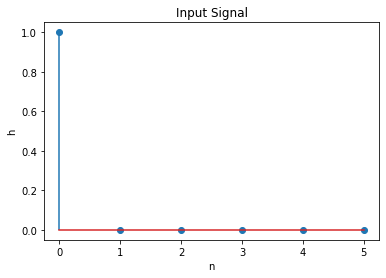

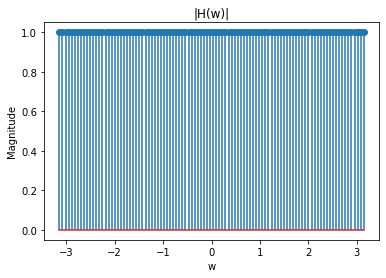

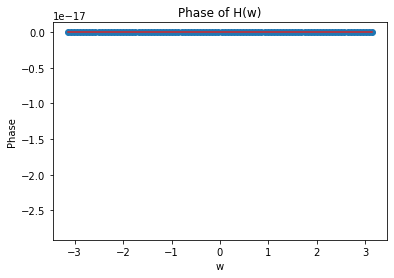

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
h = [1 if i == 0 else 0 for i in range(6)]
h_indices = [i for i in range(6)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()




# 2B

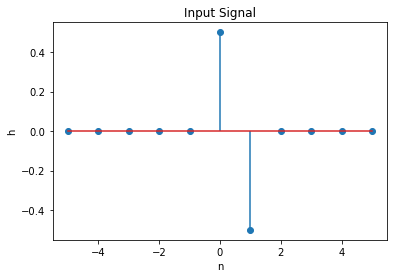

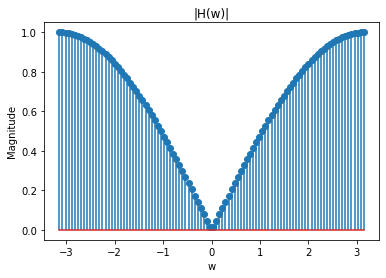

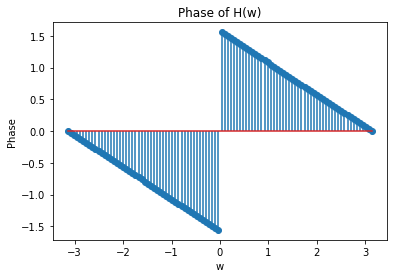

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
h = [0, 0, 0, 0, 0, 0.5, -0.5, 0, 0, 0, 0]
h_indices = [i for i in range(-5, 6)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


The convolved signal has less content of less frequencies and high cocntent of high frequencies.
The magnitude is even function.

# 2C

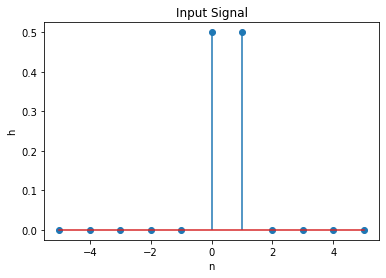

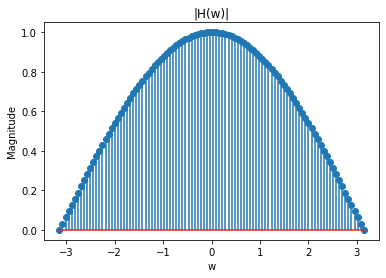

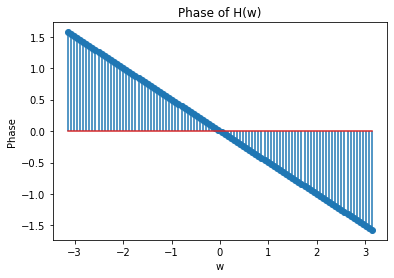

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
h = [0, 0, 0, 0, 0, 0.5, 0.5, 0, 0, 0, 0]
h_indices = [i for i in range(-5, 6)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


# 2D

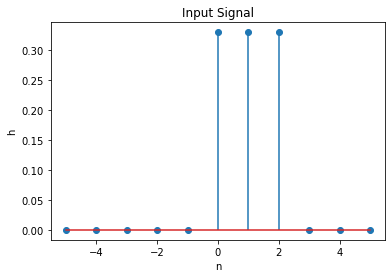

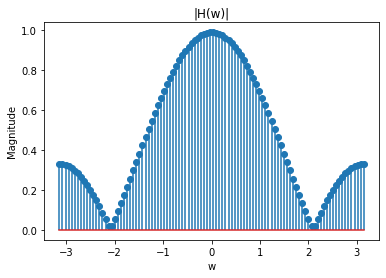

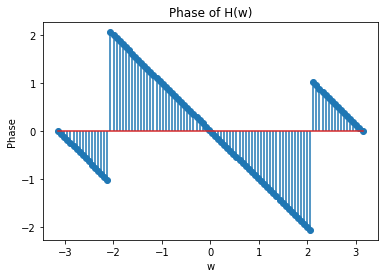

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
h = [0, 0, 0, 0, 0, 0.33, 0.33, 0.33, 0, 0, 0]
h_indices = [i for i in range(-5, 6)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


# 2E

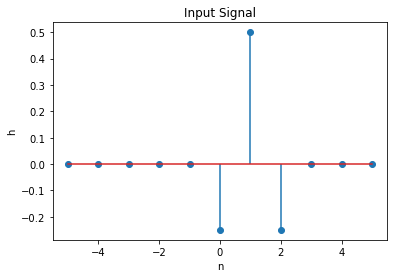

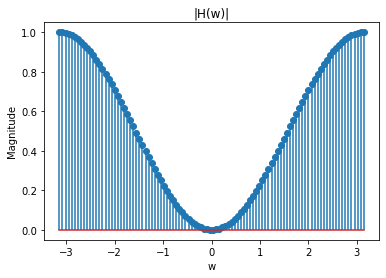

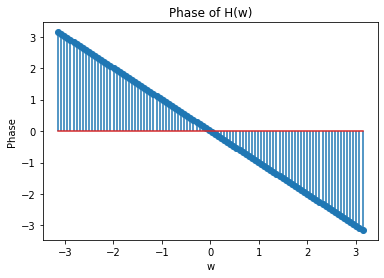

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
h = [0, 0, 0, 0, 0, -0.25, 0.5, -0.25, 0, 0, 0]
h_indices = [i for i in range(-5, 6)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


# 2F

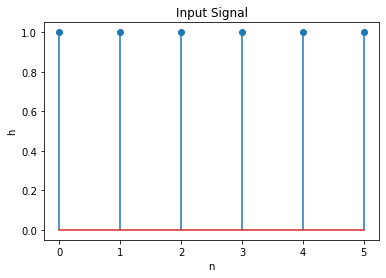

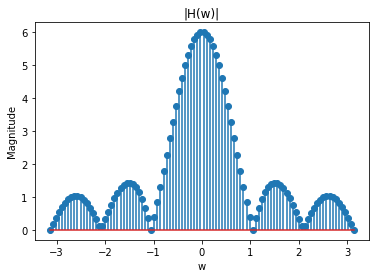

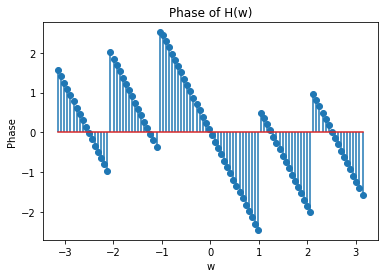

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
h = [1 for i in range(6)]
h_indices = [i for i in range(6)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


# 2G

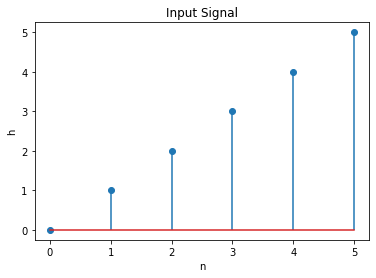

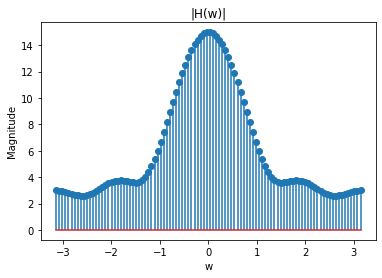

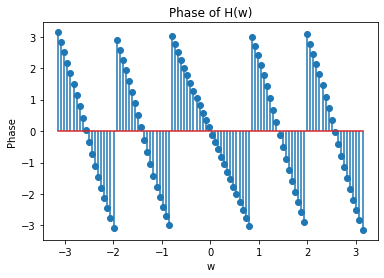

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
h = [i for i in range(6)]
h_indices = [i for i in range(6)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


# 2H

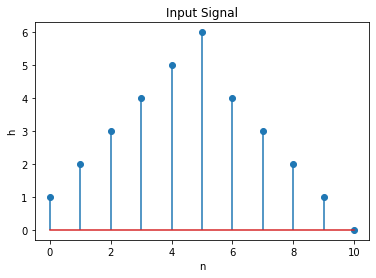

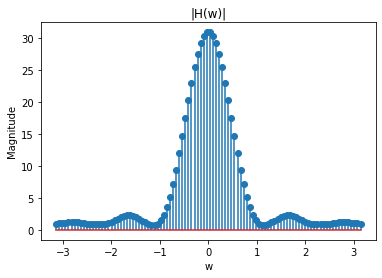

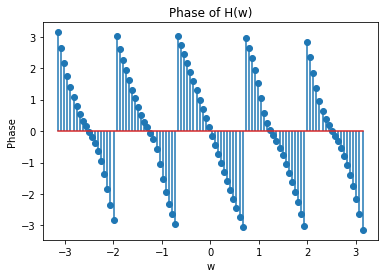

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
h = [i + 1 if i <= 5 else 10 - i for i in range(11)]
h_indices = [i for i in range(11)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


# 2I

N = 1

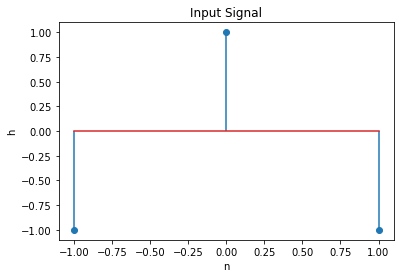

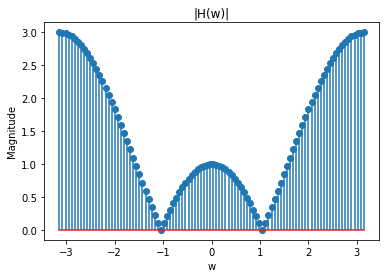

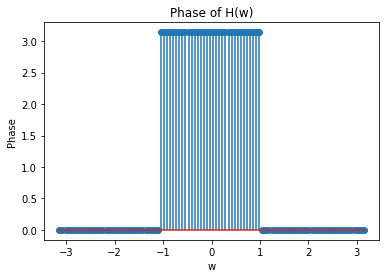

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
N = 1
h = [np.cos(np.pi * i) for i in range(-N, N+1)]
h_indices = [i for i in range(-N, N+1)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


N = 2

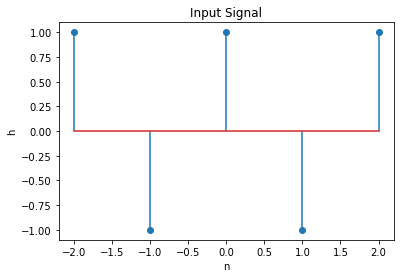

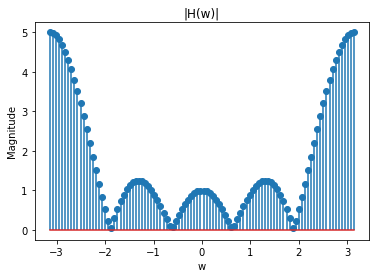

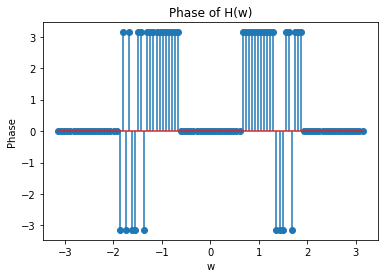

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
N = 2
h = [np.cos(np.pi * i) for i in range(-N, N+1)]
h_indices = [i for i in range(-N, N+1)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


N = 3

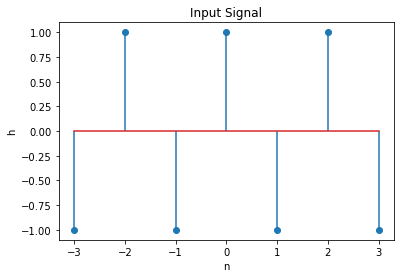

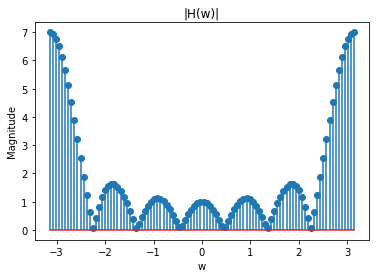

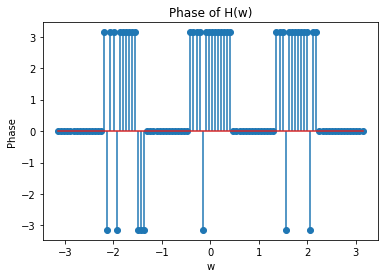

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
N = 3
h = [np.cos(np.pi * i) for i in range(-N, N+1)]
h_indices = [i for i in range(-N, N+1)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


# 2J

M = 50, w = 100

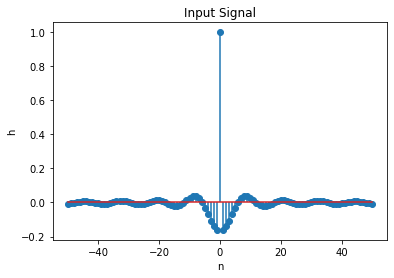

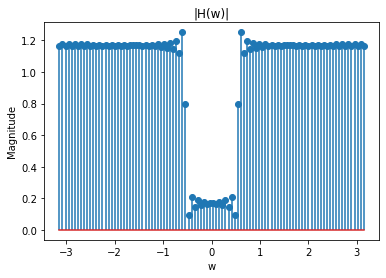

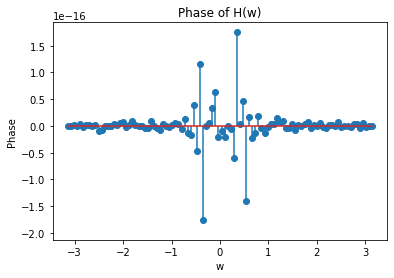

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
M = 50
w = 100
h = [np.sin(w * i)/(np.pi * i) if i != 0 else 1 for i in range(-M, M+1)]
h_indices = [i for i in range(-M, M+1)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


M = 100, w = 50

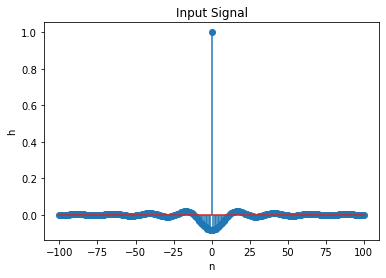

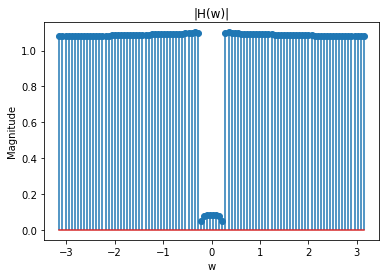

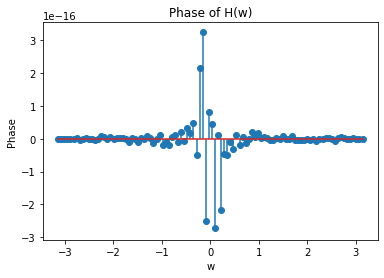

In [37]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
M = 100
w = 50
h = [np.sin(w * i)/(np.pi * i) if i != 0 else 1 for i in range(-M, M+1)]
h_indices = [i for i in range(-M, M+1)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


M = 100, w = pi

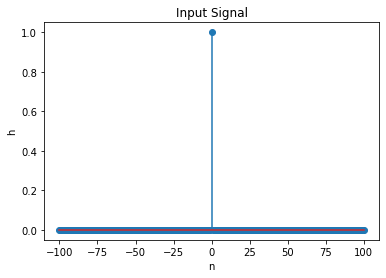

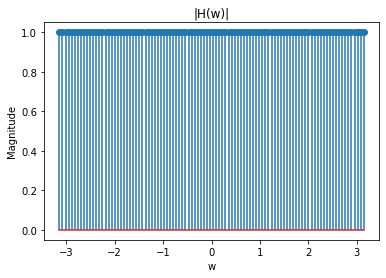

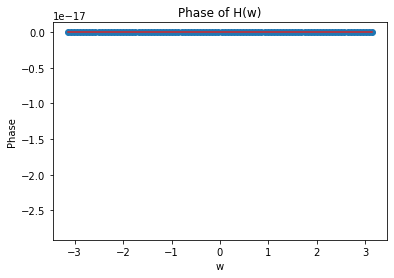

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
M = 100
w = np.pi
h = [np.sin(w * i)/(np.pi * i) if i != 0 else 1 for i in range(-M, M+1)]
h_indices = [i for i in range(-M, M+1)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


M = 100, w = e

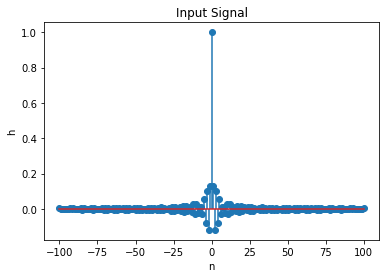

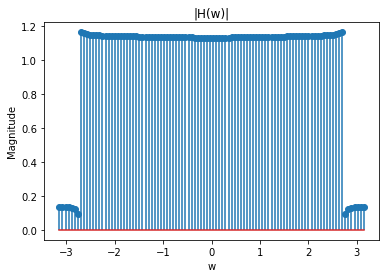

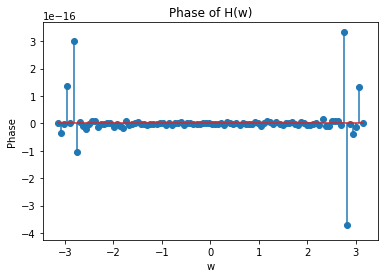

In [40]:
import numpy as np
import matplotlib.pyplot as plt

#The below function evaluates the Discrete Time Fourier Tranform of the input signal
def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

#Describing the input function
M = 100
w = np.exp(1)
h = [np.sin(w * i)/(np.pi * i) if i != 0 else 1 for i in range(-M, M+1)]
h_indices = [i for i in range(-M, M+1)]

#Computing the DTFT
DTFT, DTFTMag, DTFTPhase = DTFT(h_indices, h)

w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()

#Plotting the required graphs
plt.stem(h_indices, h)
plt.title('Input Signal')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.stem(w0, DTFTMag)
plt.title('|H(w)|')
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.show()

plt.stem(w0, DTFTPhase)
plt.title('Phase of H(w)')
plt.xlabel('w')
plt.ylabel('Phase')
plt.show()


# Question 3

# 3A

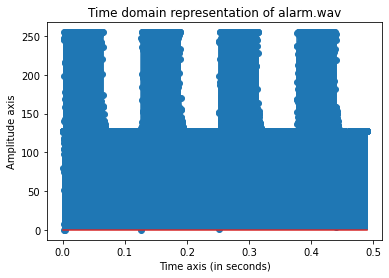

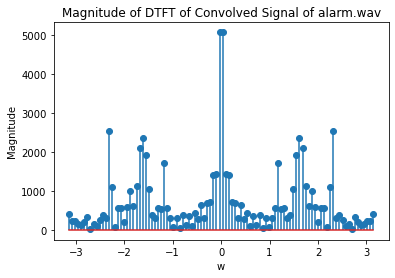

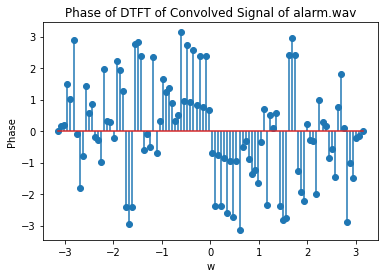

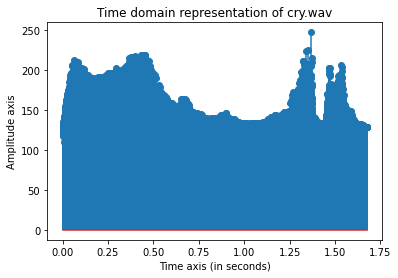

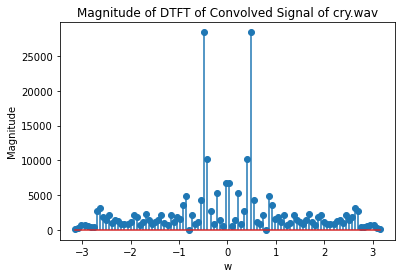

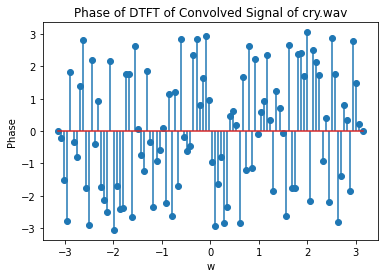

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmA.wav', 'cryA.wav']
fileIndex = 0
#Input signal 
h = [1 if i == 0 else 0 for i in range(6)]
h_indices = [i for i in range(6)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3B

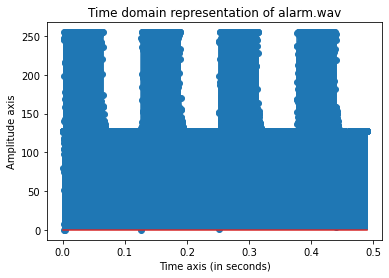

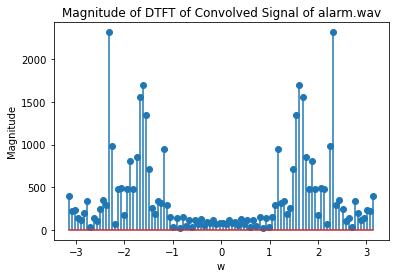

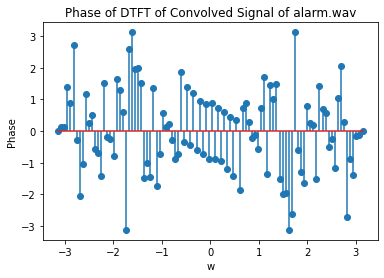

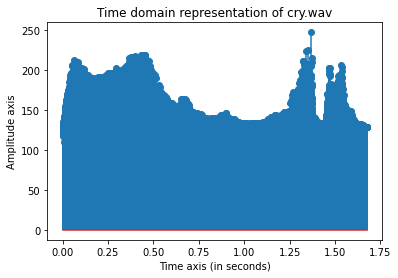

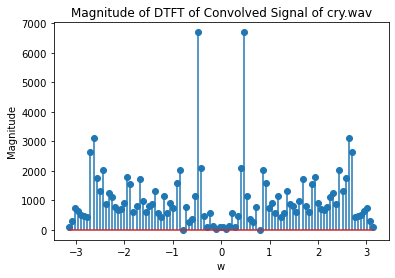

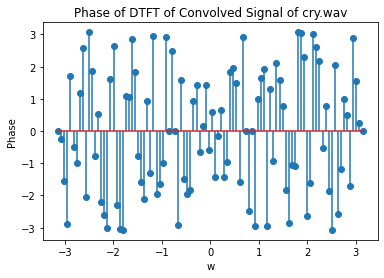

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmB.wav', 'cryB.wav']
fileIndex = 0
#Input signal 
h = [0.5, -0.5]
h_indices = [i for i in range(2)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframesraw(bytes(convolveWavArray))
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3C

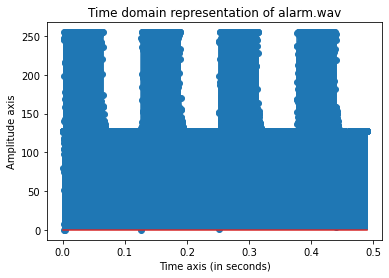

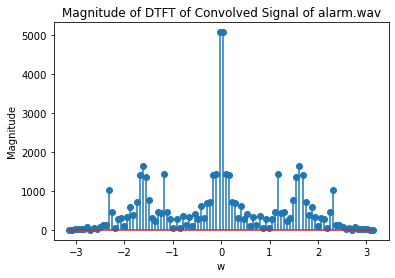

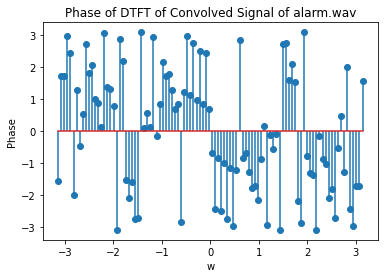

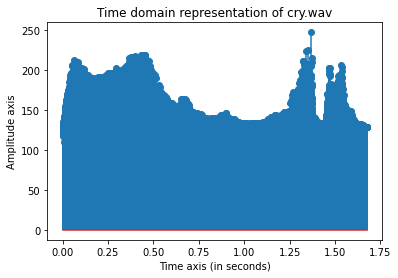

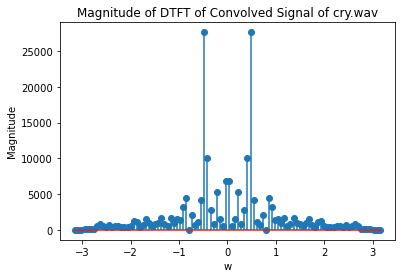

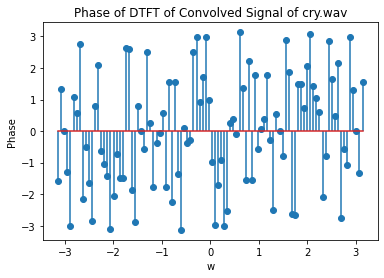

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmC.wav', 'cryC.wav']
fileIndex = 0
#Input signal 
h = [0.5, 0.5]
h_indices = [i for i in range(2)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3D

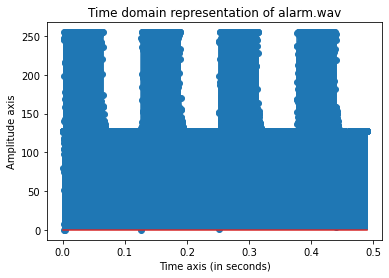

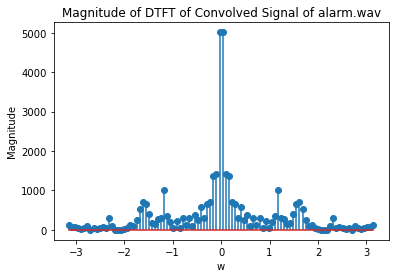

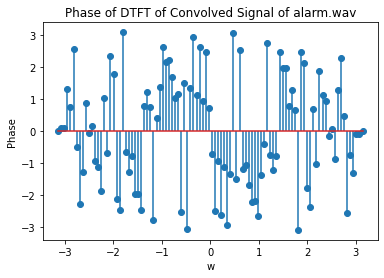

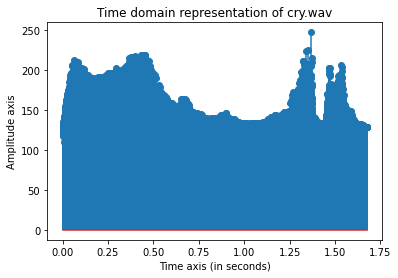

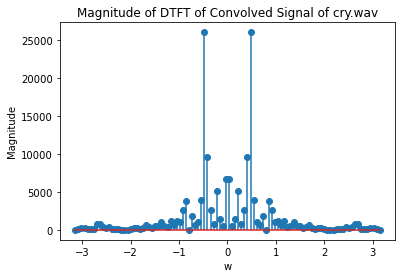

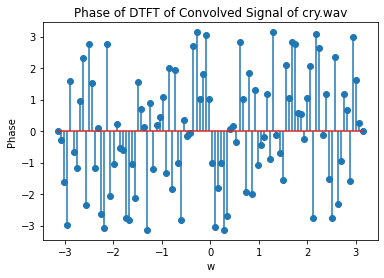

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmD.wav', 'cryD.wav']
fileIndex = 0
#Input signal 
h = [0.33, 0.33, 0.33]
h_indices = [i for i in range(3)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3E

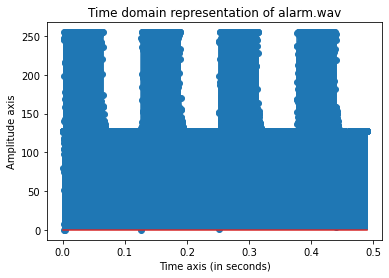

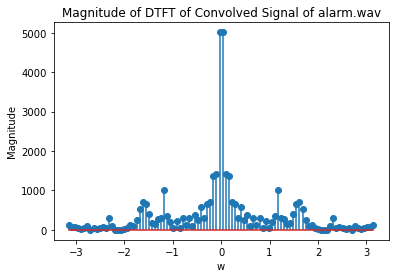

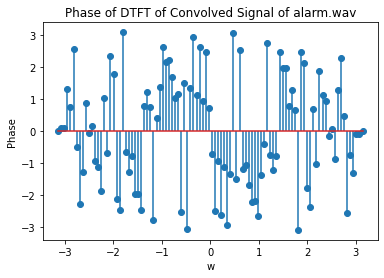

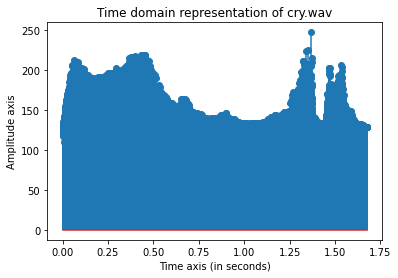

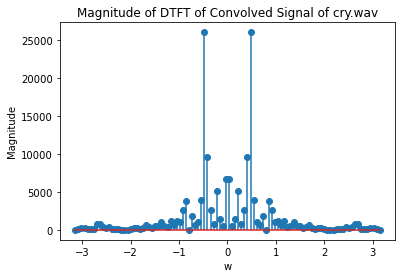

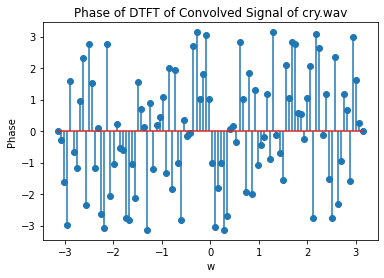

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmE.wav', 'cryE.wav']
fileIndex = 0
#Input signal 
h = [0.33, 0.33, 0.33]
h_indices = [i for i in range(3)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3F

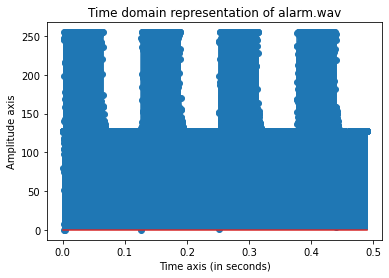

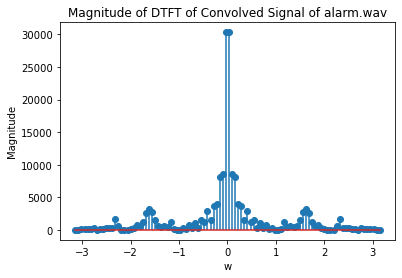

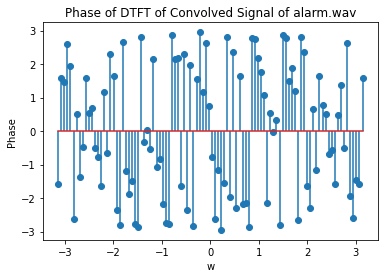

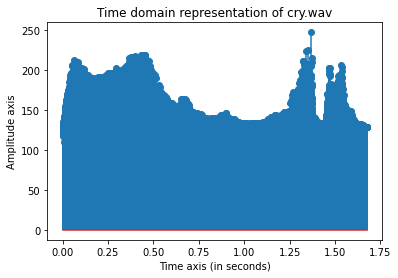

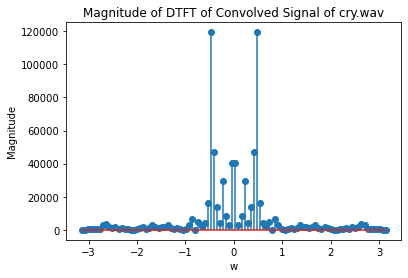

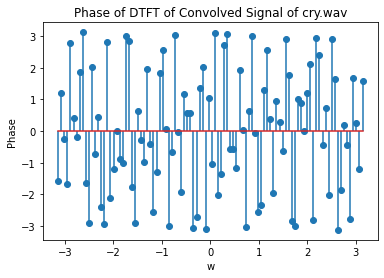

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmF.wav', 'cryF.wav']
fileIndex = 0
#Input signal 
h = [1 for i in range(6)]
h_indices = [i for i in range(6)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3G

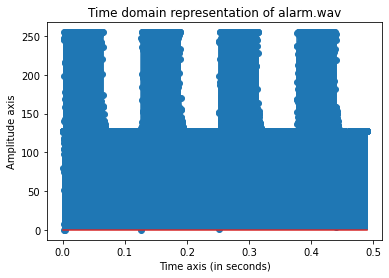

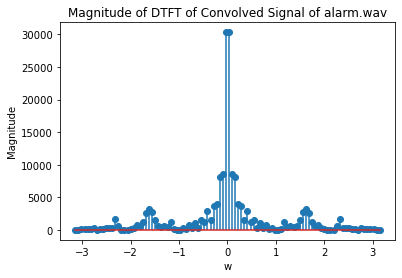

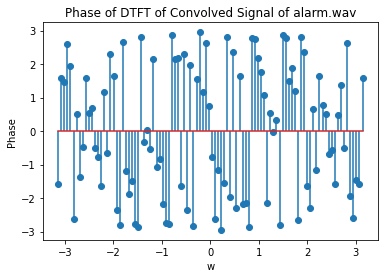

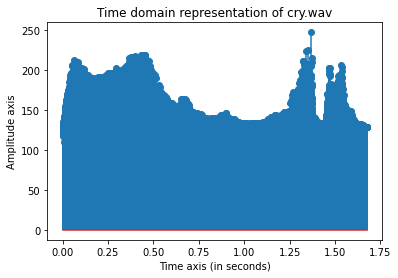

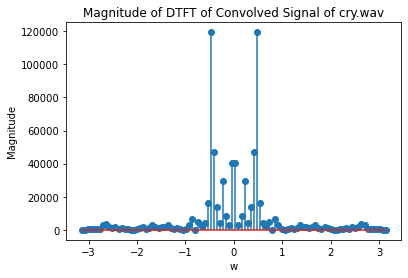

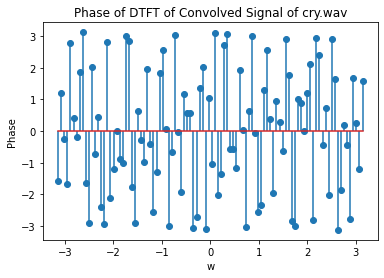

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmG.wav', 'cryG.wav']
fileIndex = 0
#Input signal 
h = [1 for i in range(6)]
h_indices = [i for i in range(6)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3H

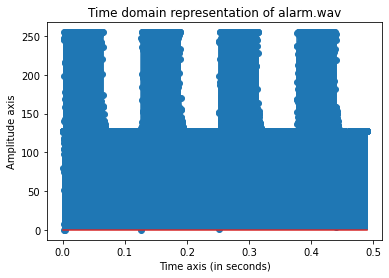

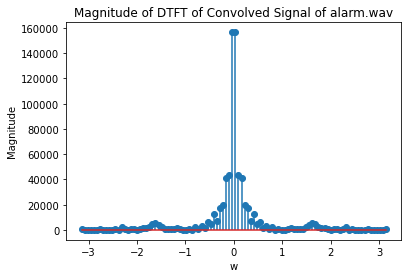

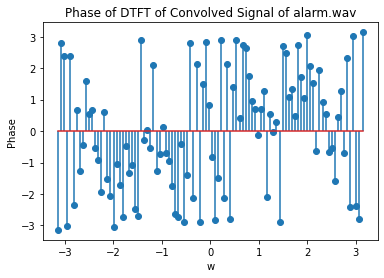

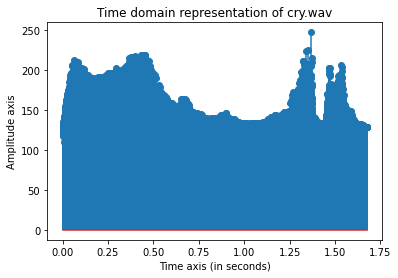

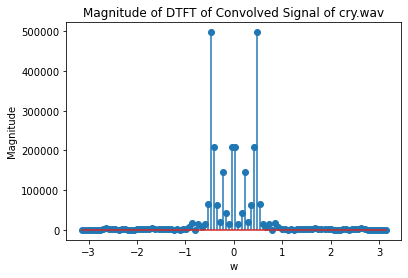

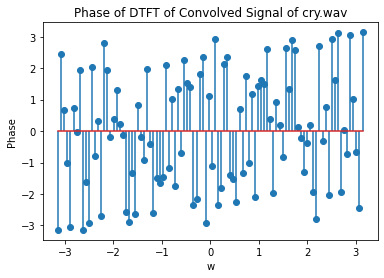

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmH.wav', 'cryH.wav']
fileIndex = 0
#Input signal 
h = [i + 1 if i <= 5 else 10 - i for i in range(11)]
h_indices = [i for i in range(11)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3I(a)

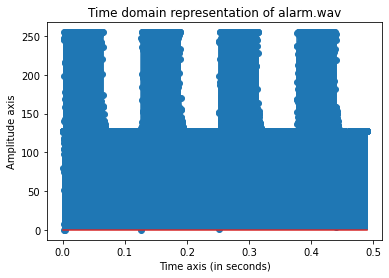

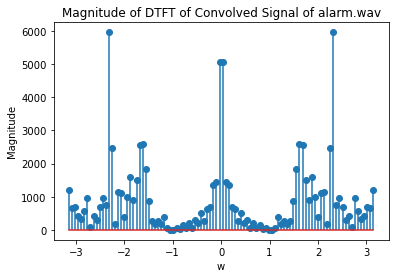

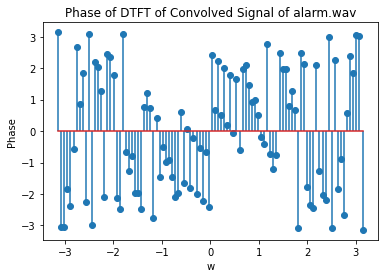

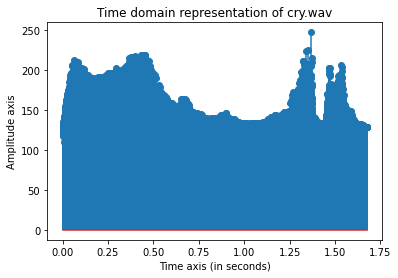

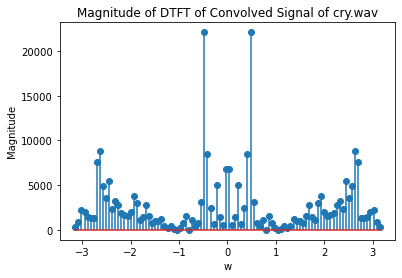

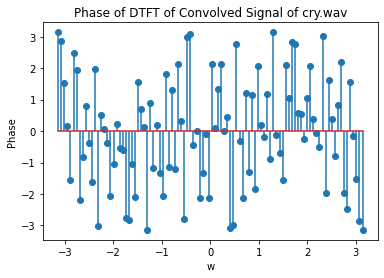

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmIa.wav', 'cryIa.wav']
fileIndex = 0
#Input signal 
N = 1
h = [np.cos(np.pi * i) for i in range(-N, N+1)]
h_indices = [i for i in range(-N, N+1)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3I(b)

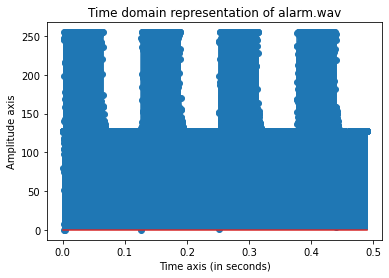

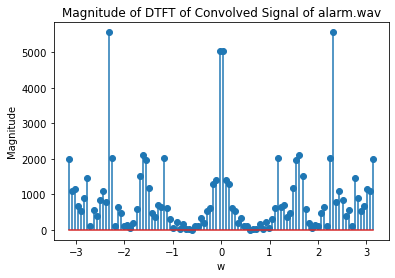

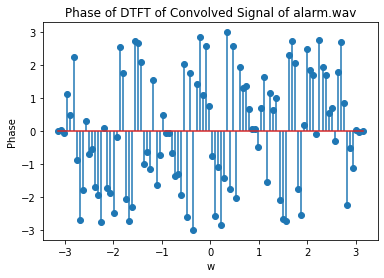

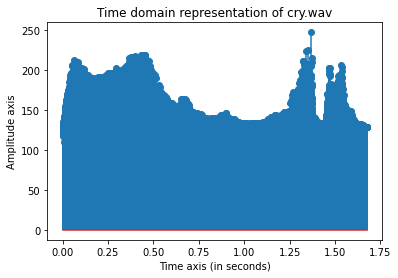

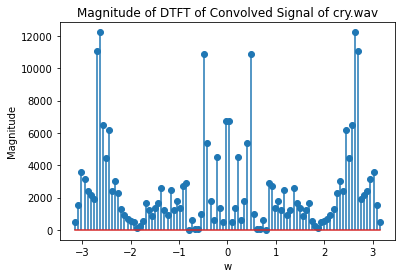

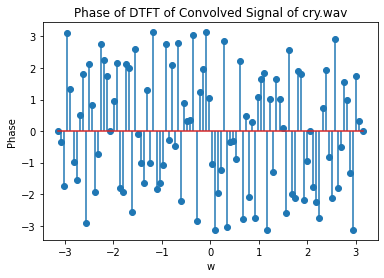

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmIb.wav', 'cryIb.wav']
fileIndex = 0
#Input signal 
N = 2
h = [np.cos(np.pi * i) for i in range(-N, N+1)]
h_indices = [i for i in range(-N, N+1)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3I(c)

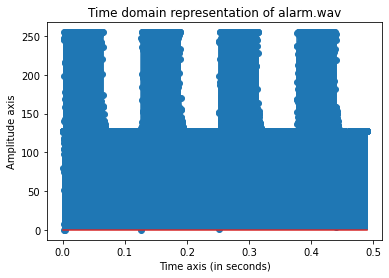

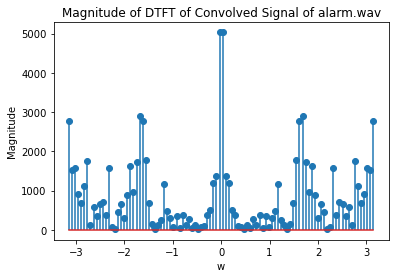

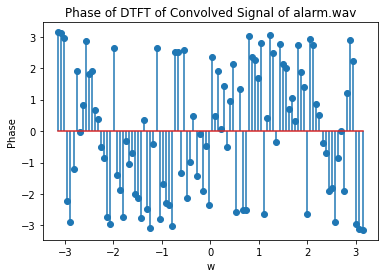

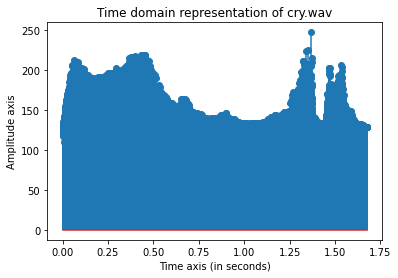

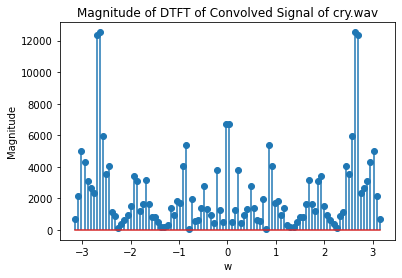

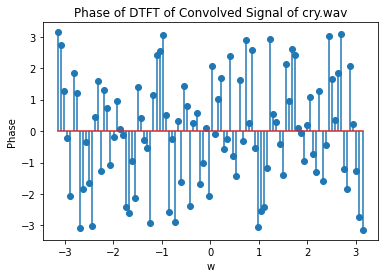

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmIc.wav', 'cryIc.wav']
fileIndex = 0
#Input signal 
N = 3
h = [np.cos(np.pi * i) for i in range(-N, N+1)]
h_indices = [i for i in range(-N, N+1)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3J(a)

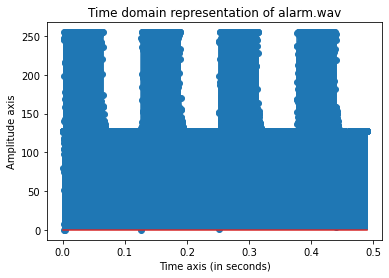

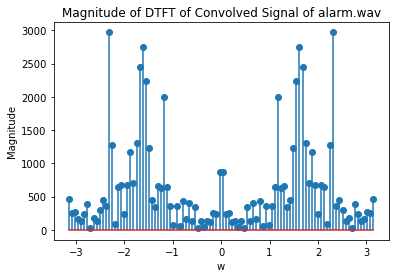

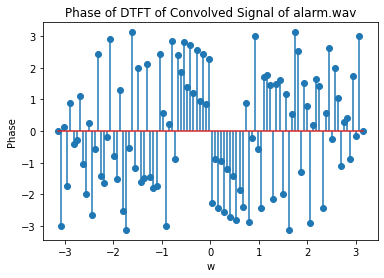

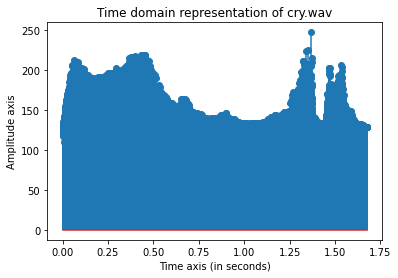

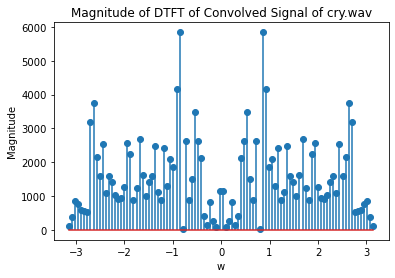

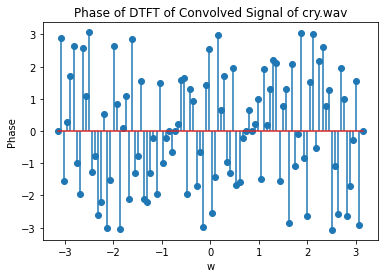

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmJa.wav', 'cryJa.wav']
fileIndex = 0
#Input signal 
M = 50
w = 100
h = [np.sin(w * i)/(np.pi * i) if i != 0 else 1 for i in range(-M, M+1)]
h_indices = [i for i in range(-M, M+1)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3J(b)

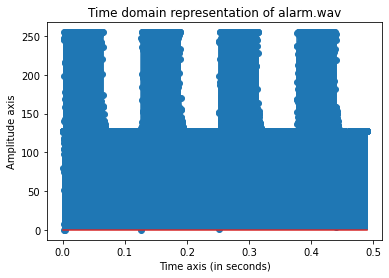

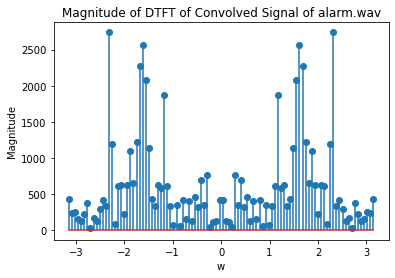

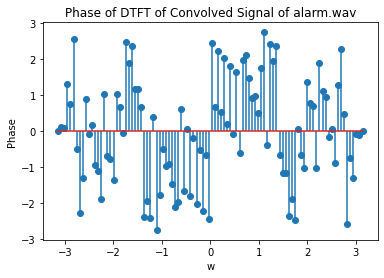

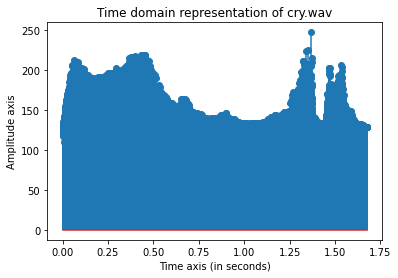

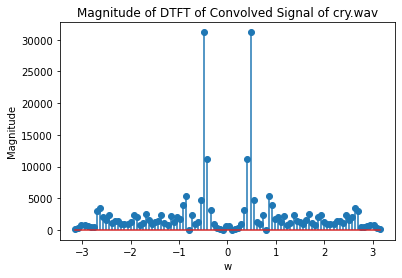

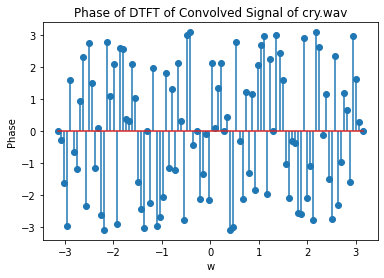

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmJb.wav', 'cryJb.wav']
fileIndex = 0
#Input signal 
M = 100
w = 50
h = [np.sin(w * i)/(np.pi * i) if i != 0 else 1 for i in range(-M, M+1)]
h_indices = [i for i in range(-M, M+1)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3J(c)

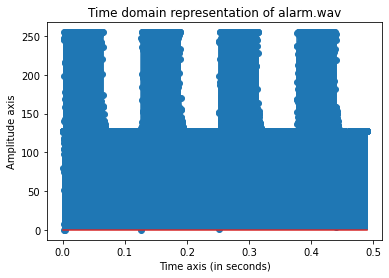

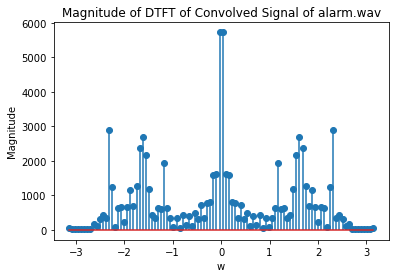

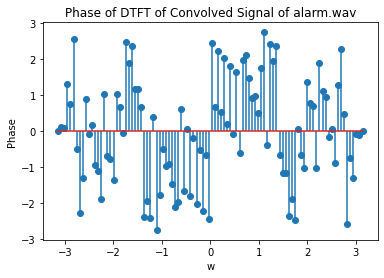

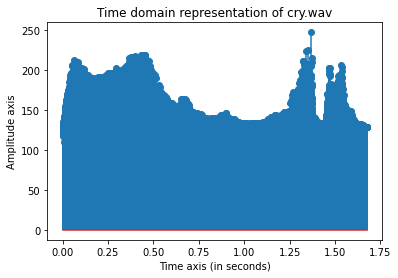

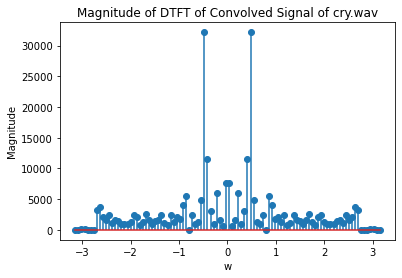

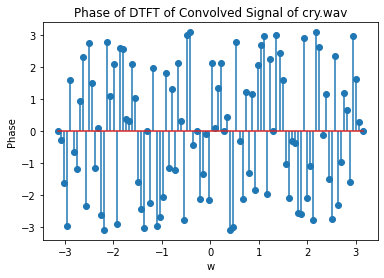

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmJc.wav', 'cryJc.wav']
fileIndex = 0
#Input signal 
M = 100
w = np.exp(1)
h = [np.sin(w * i)/(np.pi * i) if i != 0 else 1 for i in range(-M, M+1)]
h_indices = [i for i in range(-M, M+1)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# 3J(d)

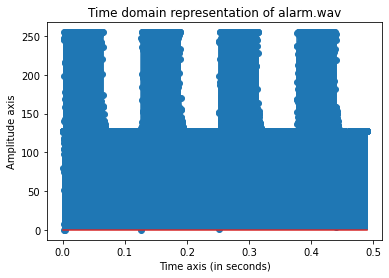

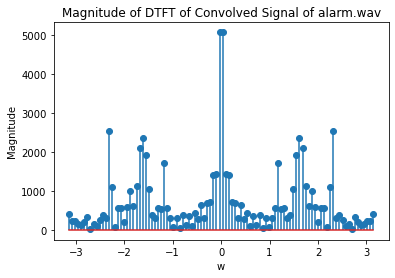

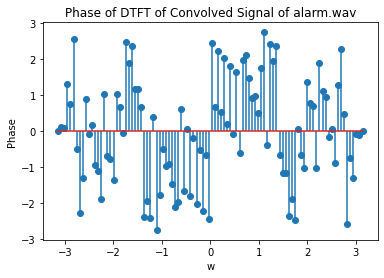

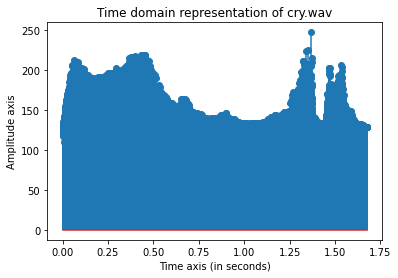

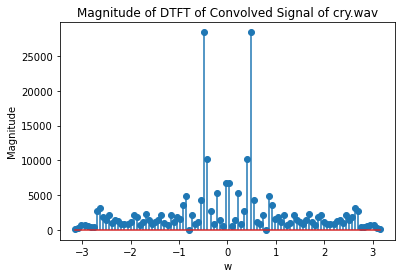

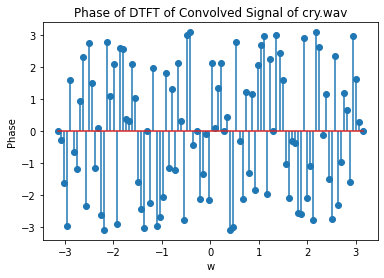

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import playsound

#Function to calculate the convolution of two signals X and H
def convolve(X, H):
    #This list stores the result
    y = []
    #To make duplicate lists of the input parameters
    x = []
    h = []
    
    for i in X:
        x.append(i)
    
    for i in H:
        h.append(i)
        
    if len(h) > len(x):
        z = x
        x = h
        h = z
    
    xLen = len(x)
    hLen = len(h)
    
    for n in range(xLen + hLen - 1):
        sum = 0
        for k in range(xLen):
            if n >= k and n-k < hLen:
                sum = sum + x[k] * h[n-k]
            else:
                continue
        y.append(sum)
            
    return y


def DTFT(indices, values):
    
    sig_indices = indices
    sig_value = values
    
    #The fourier transform is computed for 100 points of w between -pi to pi
    w_0Array = np.linspace((np.pi * -1), np.pi, 100)

    w_0 = w_0Array.tolist()

    dtft = []
    dtftReal = []
    dtftImag = []
    
    #Nested for loops to compute the fourier transform for all w in w0
    for w in w_0:
        sum = 0
        for index in range(len(sig_indices)):
            sum = sum + sig_value[index] * np.exp(-1j * w * sig_indices[index])
        dtft.append(sum)    
        dtftReal.append(sum.real)
        dtftImag.append(sum.imag)
    
    magnitudeSpectra = []
    phaseSpectra = []
    
    for index in range(len(dtftImag)):
        x = dtft[index].real
        y = dtft[index].imag
        magnitudeSpectra.append(np.sqrt(x*x + y*y))
        phaseSpectra.append(np.angle(dtft[index]))
    
    #Returns the list containing the DTFT (in complex form), the magnitude of DTFT and the phase of DTFT for the defined range of w
    return dtft, magnitudeSpectra, phaseSpectra

def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'r')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.linspace(0, duration, wav_len)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = list(amplitude1)
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_points

waveFiles = ['alarm.wav','cry.wav']
newWaveFiles = ['alarmJd.wav', 'cryJd.wav']
fileIndex = 0
#Input signal 
M = 100
w = np.pi
h = [np.sin(w * i)/(np.pi * i) if i != 0 else 1 for i in range(-M, M+1)]
h_indices = [i for i in range(-M, M+1)]

for wavFile in waveFiles:
    amplitudeWav, indicesWav = readWavFile(wavFile)
    convolveWav = convolve(amplitudeWav, h)
    w0 = (np.linspace((np.pi * -1), np.pi, 100)).tolist()
    convolveWavDTFT, convolveWavDTFTMag, convolveWavDTFTPhase = DTFT(range(len(convolveWav)), convolveWav)
    
    plt.stem(indicesWav, amplitudeWav)
    plt.xlabel('Time axis (in seconds)')
    plt.ylabel('Amplitude axis')
    plt.title('Time domain representation of {}'.format(wavFile))
    plt.show()
    
    plt.stem(w0, convolveWavDTFTMag)
    plt.title('Magnitude of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Magnitude')
    plt.show()
    
    plt.stem(w0, convolveWavDTFTPhase)
    plt.title('Phase of DTFT of Convolved Signal of {}'.format(wavFile))
    plt.xlabel('w')
    plt.ylabel('Phase')
    plt.show()
    
    wavOld = wave.open(wavFile, 'r')
    
    wavNew = wave.open(newWaveFiles[fileIndex] ,'w')   #creating new file
    wavNew.setnchannels(1)
    wavNew.setsampwidth(1)
    wavNew.setframerate(wavOld.getframerate())
    convolveWavArray = np.array(convolveWav)
    convolveWavArray = [np.uint8(i) for i in convolveWavArray[:]]
    wavNew.writeframes(bytes(convolveWavArray))
    wavNew.close()
    wavOld.close()
    
    playsound.playsound(newWaveFiles[fileIndex])
    
    fileIndex += 1

# Observations:

In the third question, we plotted the DTFT of the convolved signal of the wav files (alarm.wav, cry.wav) and the predefined input signal h[n] . 
It can be seen that the magnitude is an even function in all the cases. The phase varies between -2pi to 2pi. 
In some cases, the magnitude has high low frequency content and high high-frequency content. 
In the magnitude graphs, there is always a local maxima in a small neighbourhood of 0 frequency. 